In [1]:
import numpy as np
import pandas as pd

path_prefix = "/content/drive/MyDrive/Colab Notebooks/learn-pydata/"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 一个简单的例子

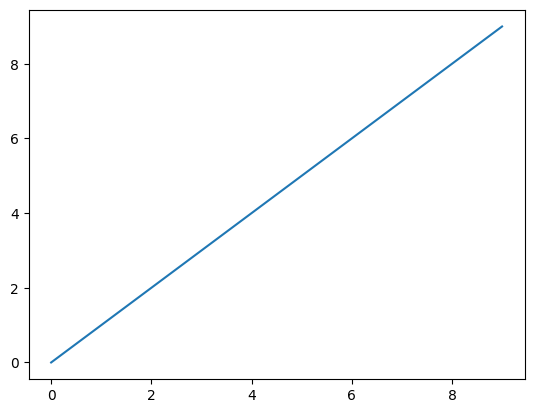

In [3]:
data = np.arange(10)
plt.plot(data)

### 画布和子图

#### 创建画布

In [5]:
fig = plt.figure()
fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

#### 创建子图

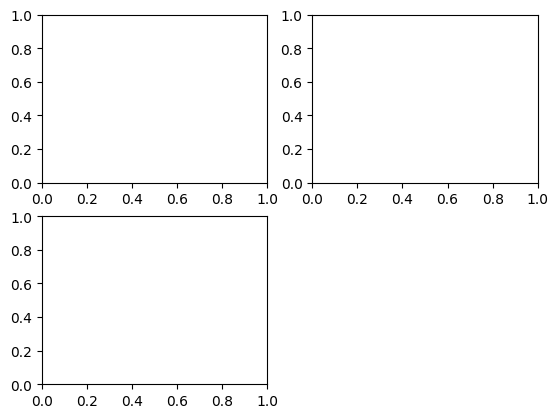

In [6]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig

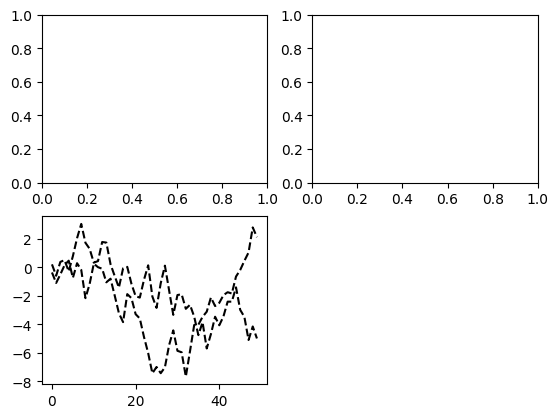

In [8]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
    linestyle="dashed")
fig

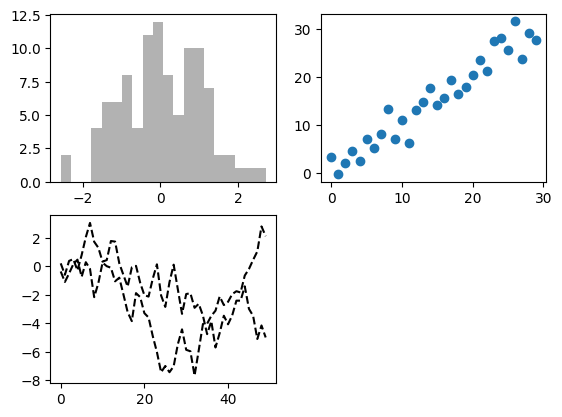

In [9]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
fig

#### 快速创建多子图

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

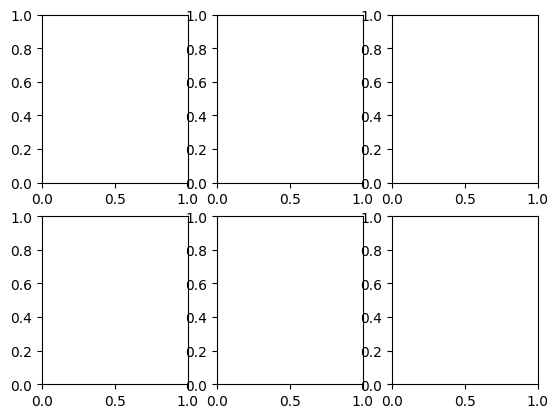

In [10]:
fig, axes = plt.subplots(2, 3)
axes

In [12]:
axes[0,1]

<Axes: >

### 调整子图间距

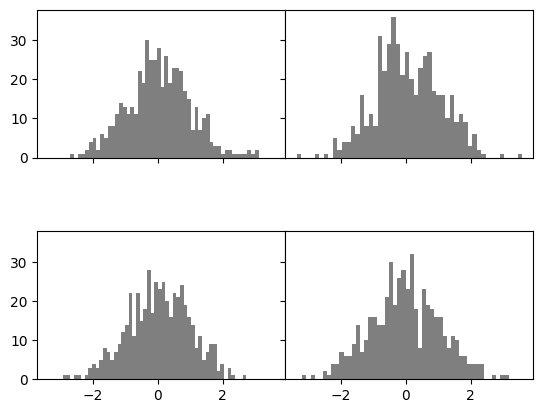

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0.5)  # 调整两个比例观察图的变化

### 颜色、标记物和线条样式

##### 标记出数据点

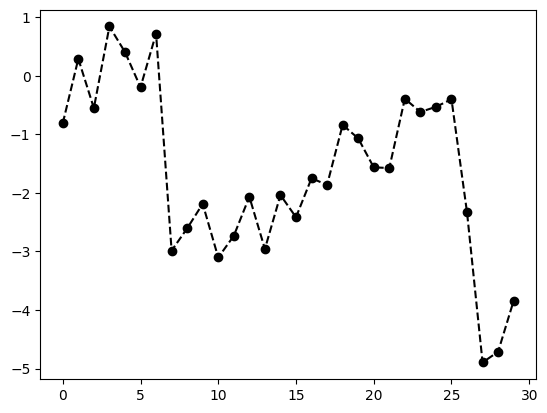

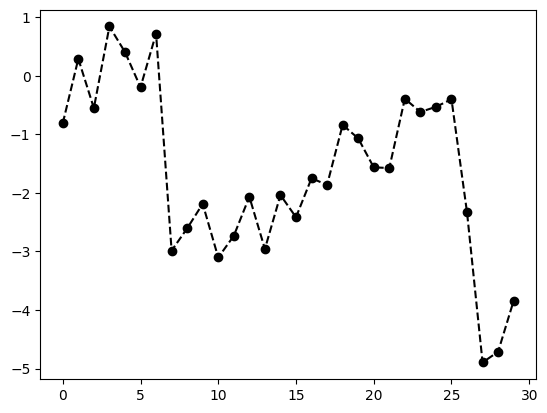

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
    linestyle="dashed", marker="o");
fig

#### 带图例

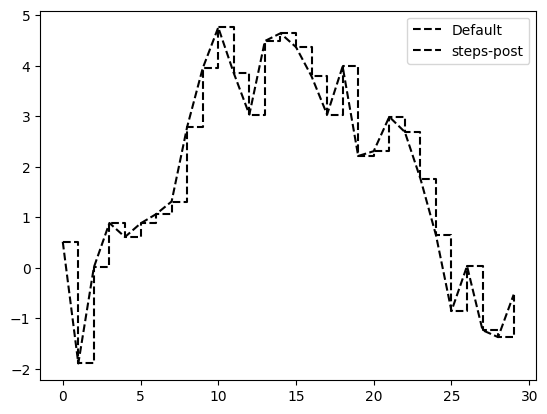

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()


### 标签和图例

#### 图表标题和轴标签

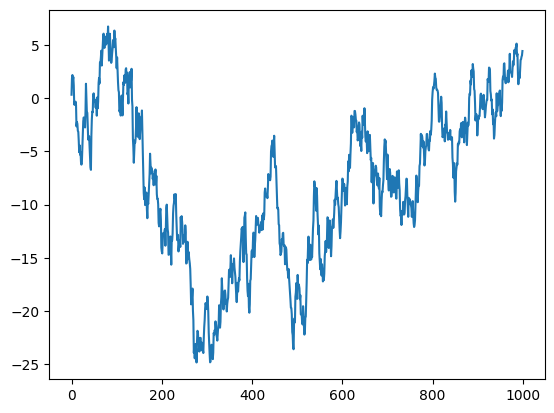

In [24]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

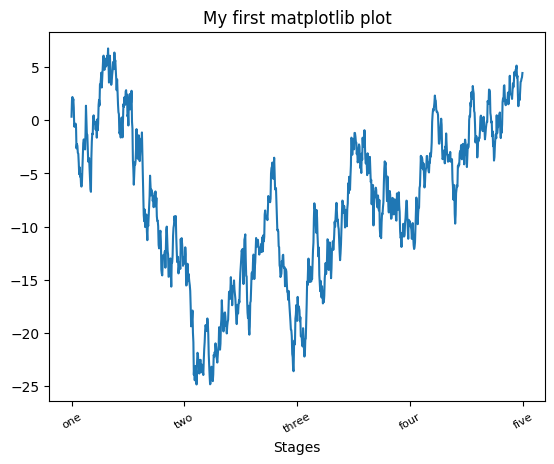

In [28]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #设置横轴刻度数值
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
          rotation=30, fontsize=8)  #设置横轴刻度标签
ax.set_xlabel("Stages") # 这只横轴标题
ax.set_title("My first matplotlib plot")  # 设置表格标题
fig

In [29]:
# 同时设置多个属性
ax.set(title="My first matplotlib plot", xlabel="Stages")

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 24.0, 'Stages')]

#### 添加图例

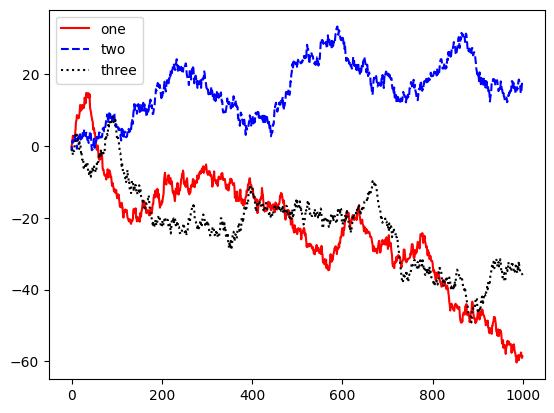

In [31]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="red", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dashed",label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");
ax.legend()

### 在小图上注释

#### 标注特别数据

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

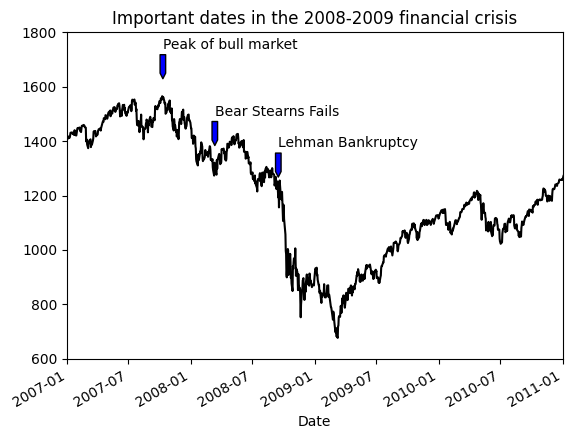

In [40]:
from datetime import datetime
fig, ax = plt.subplots()
data = pd.read_csv(path_prefix+"examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="black")
crisis_data = [
 (datetime(2007, 10, 11), "Peak of bull market"),
 (datetime(2008, 3, 12), "Bear Stearns Fails"),
 (datetime(2008, 9, 15), "Lehman Bankruptcy")
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="blue", headwidth=4, width=4,headlength=4),
        horizontalalignment="left", verticalalignment="top")
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

#### 绘制简单图形

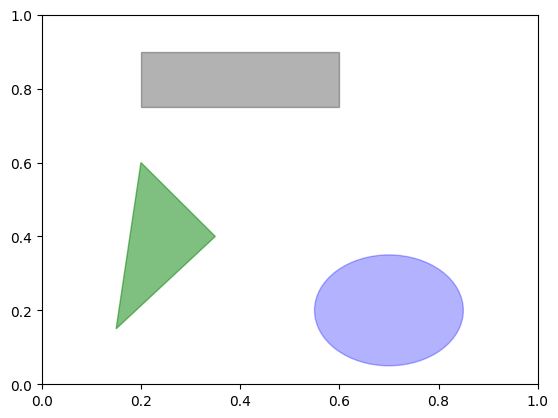

In [41]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 图形保存到文件

In [42]:
fig.savefig("figpath.svg")

In [43]:
fig.savefig("figpath.png", dpi=400)

### matplotlib配置

#### rc方法修改默认配置

In [44]:
plt.rc("figure", figsize=(10, 10))
# 第一个参数是要修改的条目，后面是要改的该条目的具体参数
plt.rc("font", family="monospace", weight="bold", size=8)

#### 恢复默认设置

In [45]:
plt.rcdefaults()

#### 修改配置文件
matplotlib
comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If
you customize this file and place it in your home directory titled .matplotlibrc, it will
be loaded each time you use matplotlib.

#  使用pandas and seaborn 绘制

### 折线图

#### series

<Axes: >

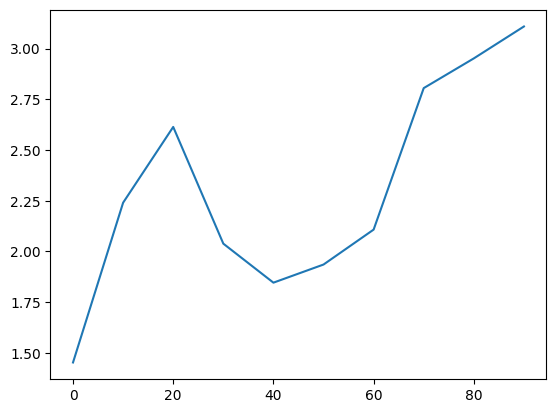

In [46]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,100, 10))
s.plot()

#### dataframe

<Axes: >

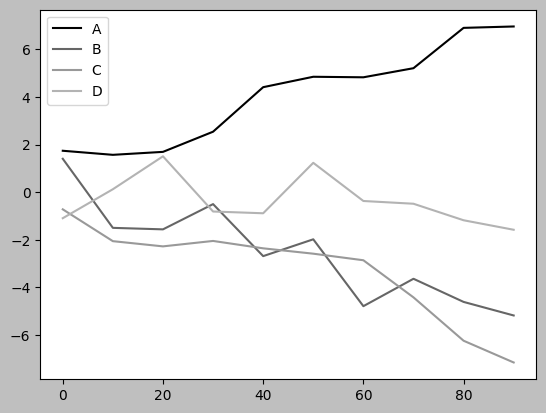

In [48]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
      columns=["A", "B", "C", "D"],
      index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

### 条形图

#### series

<Axes: >

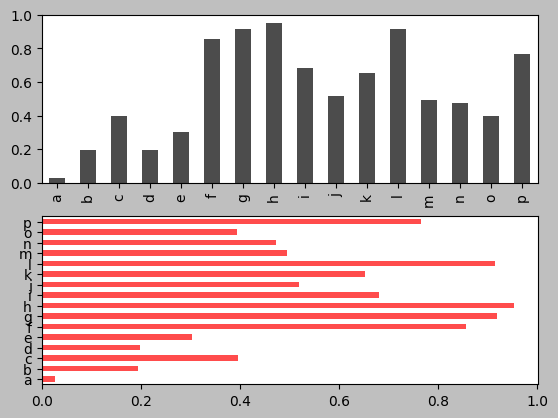

In [52]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="red", alpha=0.7)

#### frame

In [53]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
        index=["one", "two", "three", "four", "five", "six"],
        columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.200374,0.041830,0.254330,0.634173
two,0.036282,0.681658,0.656866,0.341001
three,0.645590,0.390907,0.453963,0.639370
four,0.802310,0.570406,0.399688,0.877252
five,0.628186,0.957866,0.999882,0.967669
six,0.331327,0.824814,0.930379,0.183938


<Axes: >

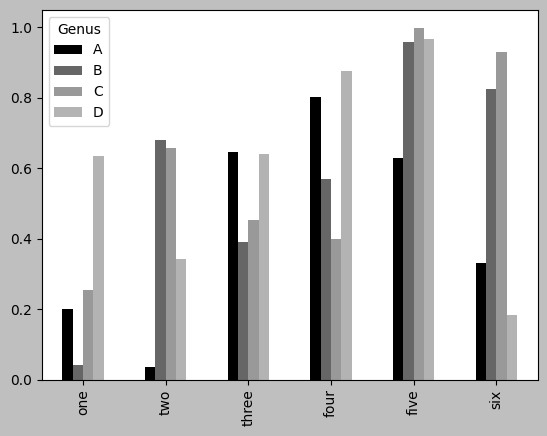

In [54]:
df.plot.bar()

<Axes: >

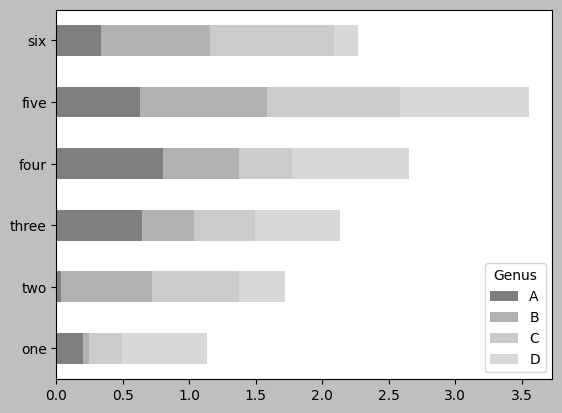

In [55]:
df.plot.barh(stacked=True, alpha=0.5)

#### 例子：统计餐厅小费和聚会规模

In [56]:
tips = pd.read_csv(path_prefix+"examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [57]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [60]:
# 1和6 次数少，移除
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [61]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

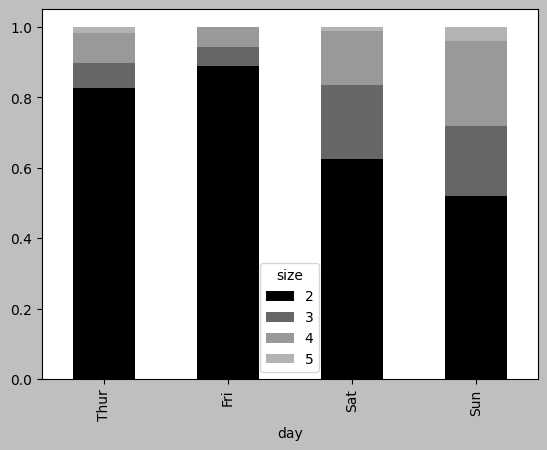

In [62]:
party_pcts.plot.bar(stacked=True)

#### 使用seaborn简化上例
导入seaborn命令：conda install seaborn

In [81]:
import seaborn as sns
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

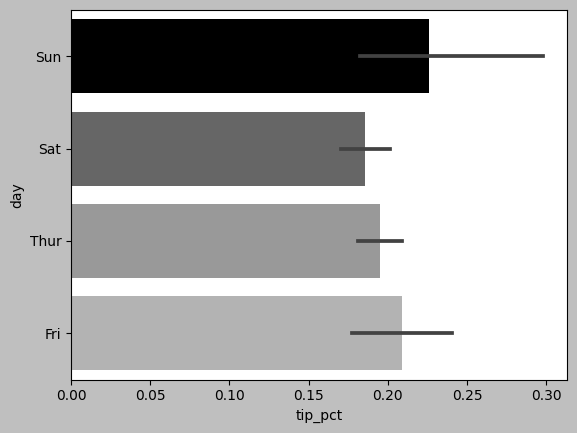

In [64]:
 sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

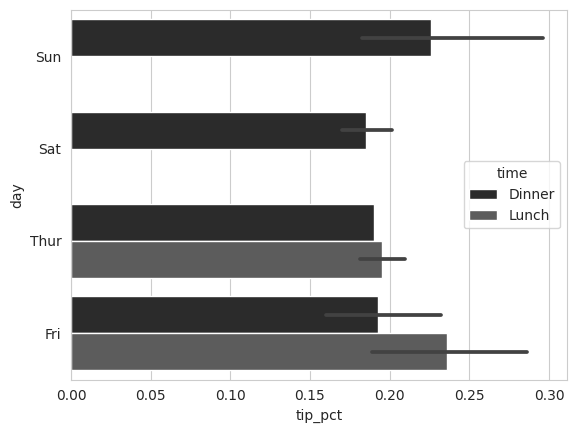

In [67]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### 直方图和密度图

#### 使用pandas

<Axes: ylabel='Frequency'>

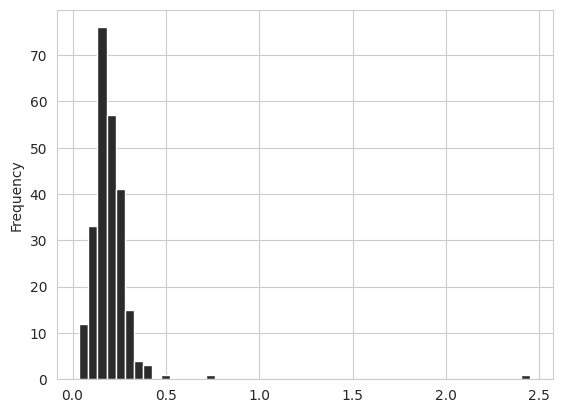

In [68]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

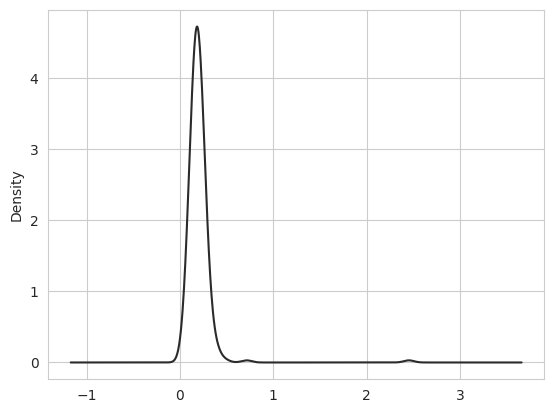

In [74]:
# 需要scipy 安装命令：conda install scipy
tips["tip_pct"].plot.density()

#### 使用seaborn

<Axes: ylabel='Count'>

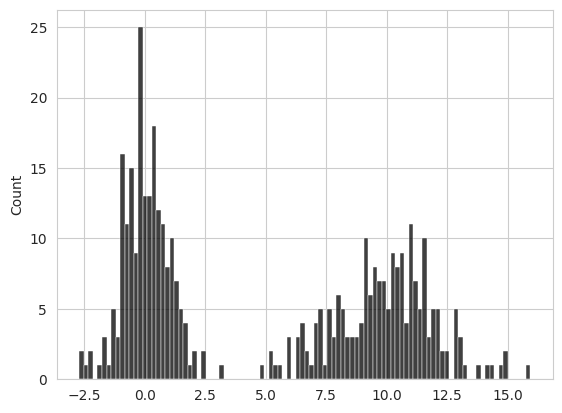

In [75]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")

### 散点图

In [76]:
macro = pd.read_csv(path_prefix+"examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

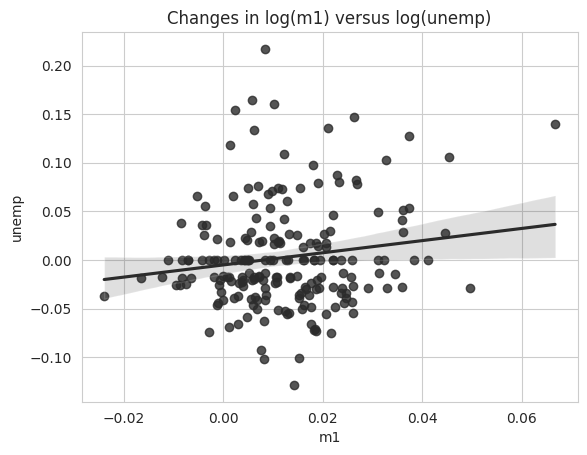

In [85]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

#### 散点阵列图

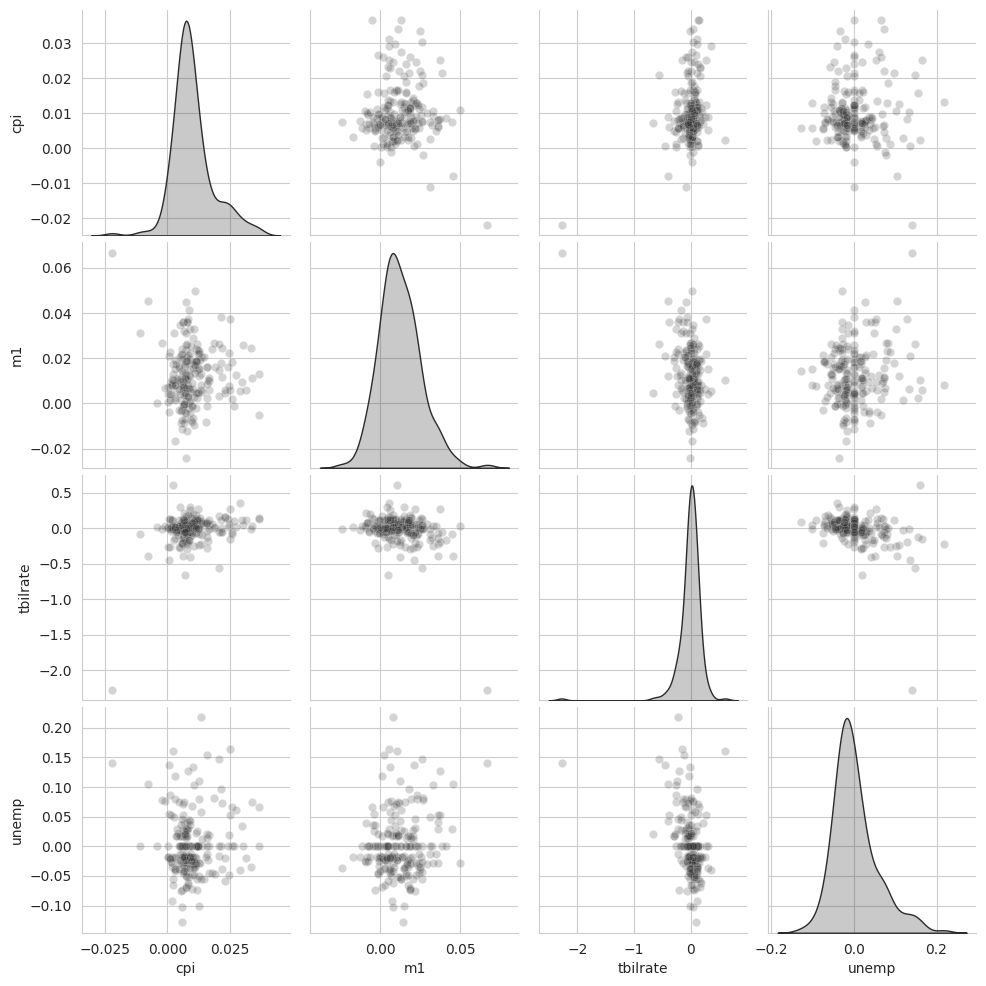

In [84]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### 网格和分类数据

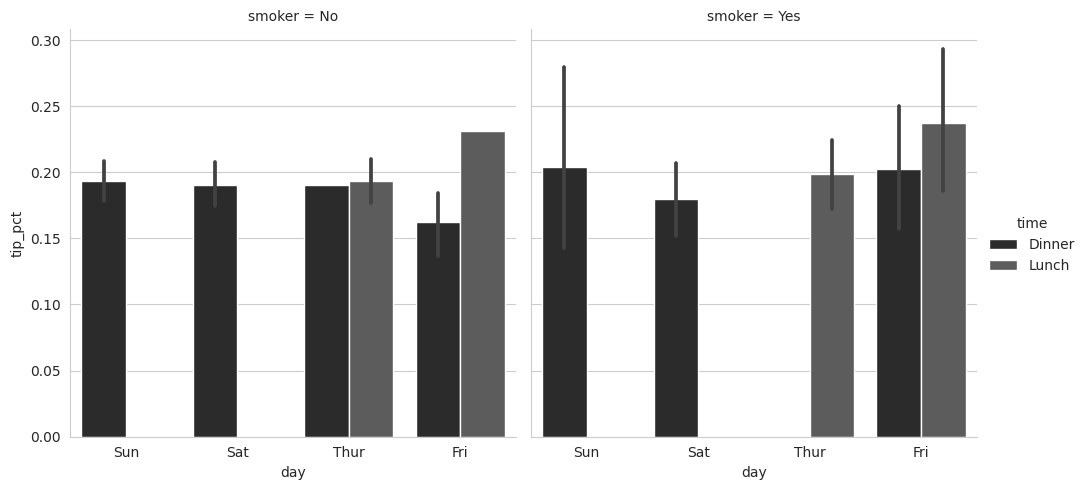

In [86]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
          kind="bar", data=tips[tips.tip_pct < 1])

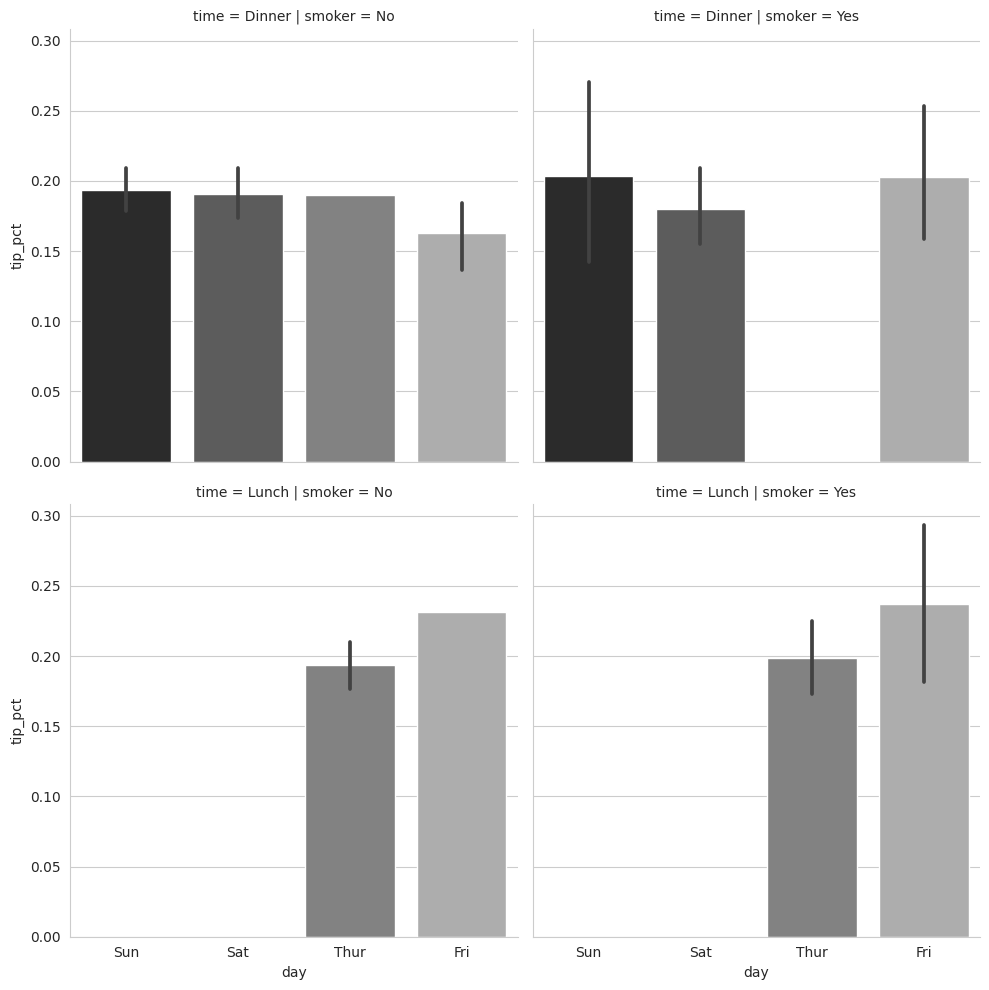

In [87]:
sns.catplot(x="day", y="tip_pct", row="time",
    col="smoker",
    kind="bar", data=tips[tips.tip_pct < 1])

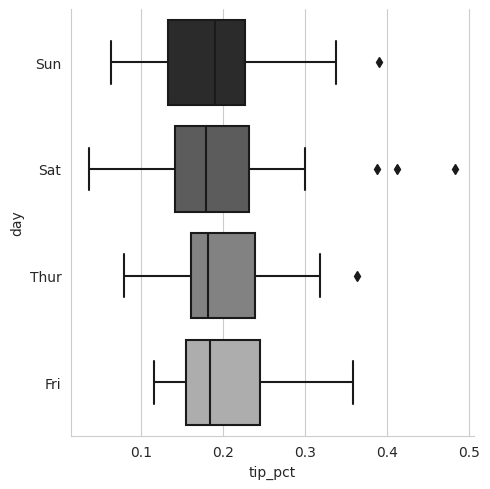

In [88]:
sns.catplot(x="tip_pct", y="day", kind="box",
      data=tips[tips.tip_pct < 0.5])